# Convolution of the flux and interaction cross-section

Miscellaneous:

In [148]:
import sys

sys.path.append("../../..")

import numpy as np
import pandas as pd
from scipy import optimize
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from matplotlib import rc
import mpl_toolkits.axes_grid1.inset_locator as inloc
import scipy.stats as stats
from src.nu_osc.default_parameters import CONV_CM2_TO_BARN

<p> </p>
To make plots more beautiful

In [56]:
rc("figure", figsize=(10, 5))
# rc('lines', linewidth=2)
rc("axes", labelsize=12, linewidth=1, grid=True, labelpad=-1, axisbelow=True)
rc("axes.spines", right=True)
rc("xtick", direction="in", labelsize=12, top=True)
rc("xtick.major", width=0.8, size=5)
rc("ytick", direction="in", labelsize=12, right=True)
rc("ytick.major", width=0.8, size=5)
rc("legend", fancybox=False, fontsize=12, shadow=False)
rc(
    "grid",
    linewidth=1.0,
)  # ls='dotted')
# import matplotlib_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

## Inferred fluxes at SK from ND280

<p> </p>
Defining a $\texttt{pandas dataframe}$:

In [57]:
fluxes = pd.read_csv(
    "t2kflux_2020_plus250kA_nominal_sk.csv",
    delimiter=",",
    usecols=(lambda x: x != "Bin#"),
)
fluxes = fluxes.rename(columns={"anti-numu": "antinumu", "anti-nue": "antinue"})
fluxes.head()

,minE,maxE,numu,antinumu,nue,antinue
0,0.00,0.01,866.0,892.0,7.04,2.03
1,0.01,0.02,5150.0,5940.0,57.80,11.10
2,0.02,0.03,11400.0,14200.0,135.00,25.60
3,0.03,0.04,19000.0,24400.0,245.00,44.70
4,0.04,0.05,26600.0,35600.0,404.00,64.40


In [58]:
fluxes.describe()

,minE,maxE,numu,antinumu,nue,antinue
count,138.000000,138.000000,1.380000e+02,138.000000,138.000000,138.000000
mean,3.777174,3.994565,3.667457e+05,19051.943014,2801.880065,299.137313
std,7.011859,7.350760,4.188749e+05,14349.800825,2179.844692,201.454071
min,0.000000,0.010000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.342500,0.352500,1.030000e+04,2105.000000,427.750000,86.325000
50%,0.685000,0.695000,1.580000e+05,25450.000000,3105.000000,358.500000
75%,2.375000,2.550000,6.715000e+05,28900.000000,4997.500000,490.750000
max,29.000000,30.000000,1.210000e+06,55700.000000,5660.000000,531.000000


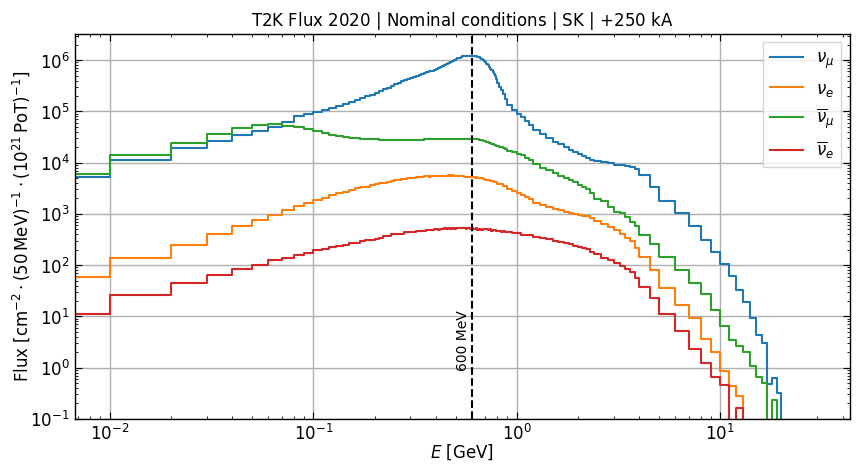

In [59]:
plt.step(fluxes.minE, fluxes.numu, label=r"$\nu_\mu$")
plt.step(fluxes.minE, fluxes.nue, label=r"$\nu_e$")
plt.step(fluxes.minE, fluxes.antinumu, label=r"$\overline{\nu}_\mu$")
plt.step(fluxes.minE, fluxes.antinue, label=r"$\overline{\nu}_e$")
plt.axvline(x=0.6, linestyle="--", color="black")
plt.annotate(r"600 MeV", xy=(0.5, 1), fontsize=10, rotation=90)

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(
    r"Flux [$\text{cm}^{-2}\cdot (50\,\text{MeV})^{-1} \cdot (10^{21}\,\text{PoT})^{-1}$]"
)
plt.ylim(bottom=1e-1)        >>> {minE,maxE,numu,anti-numu,nue,anti-nue}
plt.title(r"T2K Flux 2020 | Nominal conditions | SK | $+250$ kA")
plt.legend()

plt.show()

In [220]:
for key in ["numu", "nue", "antinumu", "antinue"]:
    fluxes["true" + key] = fluxes[key] * (fluxes.maxE - fluxes.minE) * 1e3 / (50 * 1e21)

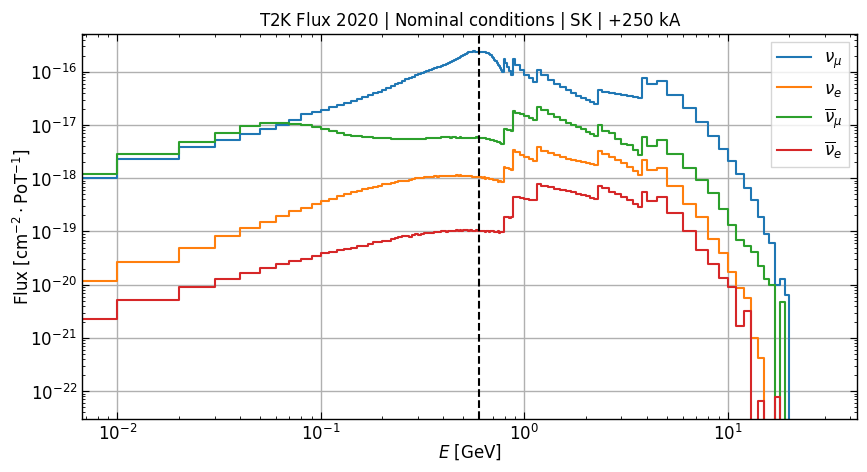

In [221]:
plt.step(fluxes.minE, fluxes.truenumu, label=r"$\nu_\mu$")
plt.step(fluxes.minE, fluxes.truenue, label=r"$\nu_e$")
plt.step(fluxes.minE, fluxes.trueantinumu, label=r"$\overline{\nu}_\mu$")
plt.step(fluxes.minE, fluxes.trueantinue, label=r"$\overline{\nu}_e$")
plt.axvline(x=0.6, linestyle="--", color="black")
plt.annotate(r"600 MeV", xy=(0.5, 1), fontsize=10, rotation=90)

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"Flux [$\text{cm}^{-2} \cdot \text{PoT}^{-1}$]")
# plt.ylim(bottom=1e-1)
plt.title(r"T2K Flux 2020 | Nominal conditions | SK | $+250$ kA")
plt.legend()

plt.show()

In [60]:
fluxes = fluxes.assign(total=lambda df: df.numu + df.nue + df.antinumu + df.antinue)

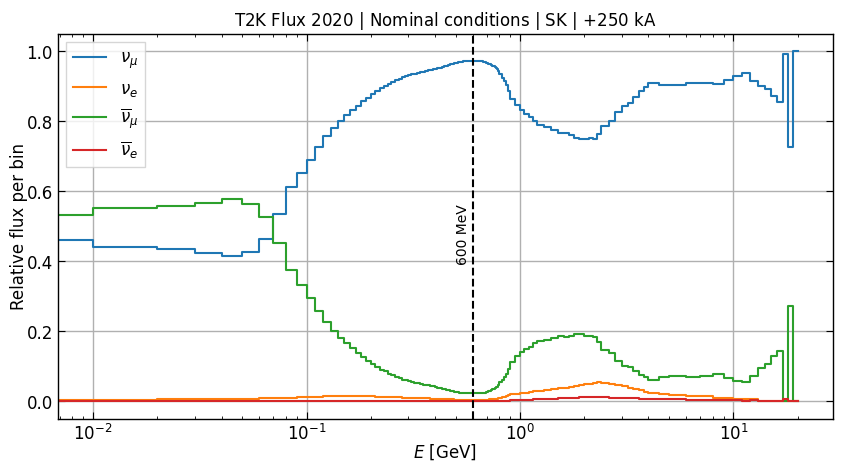

In [61]:
plt.step(fluxes.minE, fluxes.numu / fluxes.total, label=r"$\nu_\mu$")
plt.step(fluxes.minE, fluxes.nue / fluxes.total, label=r"$\nu_e$")
plt.step(fluxes.minE, fluxes.antinumu / fluxes.total, label=r"$\overline{\nu}_\mu$")
plt.step(fluxes.minE, fluxes.antinue / fluxes.total, label=r"$\overline{\nu}_e$")
plt.axvline(x=0.6, linestyle="--", color="black")
plt.annotate(r"600 MeV", xy=(0.5, 4e-1), fontsize=10, rotation=90)

plt.xscale("log")
# plt.yscale('log')
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"Relative flux per bin")
# plt.ylim(bottom=1e-4)
plt.title(r"T2K Flux 2020 | Nominal conditions | SK | $+250$ kA")
plt.legend()

plt.show()

In [62]:
integrals = {}
summed_integral = 0
for key in ["numu", "nue", "antinumu", "antinue"]:
    integrals[key] = [
        ((fluxes.maxE - fluxes.minE) * fluxes[key]).sum()
        * (50 * 1e21)
        / (1e3 * CONV_CM2_TO_BARN)
    ]  # result in b/PoT
    summed_integral += integrals[key][0]
for key in ["numu", "nue", "antinumu", "antinue"]:
    integrals[key].append(integrals[key][0] / summed_integral)
pd.DataFrame(integrals, index=["abs", "relat"])

,numu,nue,antinumu,antinue
abs,30.182094,0.358409,2.030763,0.055815
relat,0.925063,0.010985,0.062242,0.001711


<p> </p>

So that the integrated flux at SK (2020, nominal, FHC) per chanel is
$$
\begin{matrix}
    \Phi_{\nu_\mu} & = & 30.182 & (\text{b} \cdot \text{PoT})^{-1} & & & (92.51 \%) \\
    \Phi_{\nu_e} & = & 0.358 & (\text{b} \cdot \text{PoT})^{-1} & & & (1.10 \%) \\
    \Phi_{\overline{\nu}_\mu} & = & 2.031 & (\text{b} \cdot \text{PoT})^{-1} & & & (6.22 \%) \\
    \Phi_{\overline{\nu}_e} & = & 0.056 & (\text{b} \cdot \text{PoT})^{-1} & & & (0.17 \%) \\ \\
    \hline \\
    \Phi_\text{tot} & = & 32.627 & (\text{b} \cdot \text{PoT})^{-1} & & & (100 \%) 
\end{matrix}
$$

___________________________________

## Interaction cross-section of the CCQE

In [63]:
xsec = pd.read_csv("neutrino_ccqe.csv", delimiter=";", names=["energy", "xsec"])
xsec.head()

,energy,xsec
0,0.086882,0.000000
1,0.094864,0.001196
2,0.100883,0.003331
3,0.107284,0.009699
4,0.112103,0.030876


In [64]:
xsec.describe()

,energy,xsec
count,137.000000,137.000000
mean,4.044074,0.407741
std,12.373001,0.278063
min,0.086882,0.000000
25%,0.222499,0.150431
50%,0.722401,0.399238
75%,2.055782,0.664265
max,100.882722,0.837624


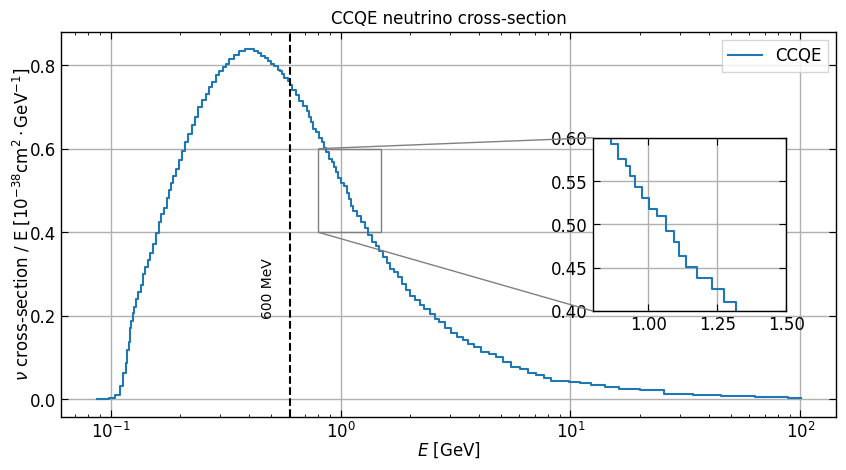

In [214]:
plt.step(xsec.energy, xsec.xsec, label=r"CCQE", where="mid")
plt.axvline(x=0.6, linestyle="--", color="black")
plt.annotate(r"600 MeV", xy=(0.45, 2e-1), fontsize=10, rotation=90)

plt.xscale("log")
# plt.yscale("log")
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$\nu$ cross-section / E [$10^{-38} \text{cm}^2 \cdot \text{GeV}^{-1}$]")
# plt.ylim(bottom=1e-1)
plt.title(r"CCQE neutrino cross-section")
plt.legend()

ax = plt.gca()
axins = inloc.inset_axes(ax, width="25%", height="45%", loc=5, borderpad=3)
axins.set_xlim(0.8, 1.5)
axins.set_ylim(0.4, 0.6)
plt.step(xsec.energy, xsec.xsec, label=r"CCQE", where="mid")
axins.grid(True, "both")
inloc.mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")

plt.show()

In [98]:
xsec = xsec.assign(truexsec=xsec.xsec * xsec.energy * 1e-38)

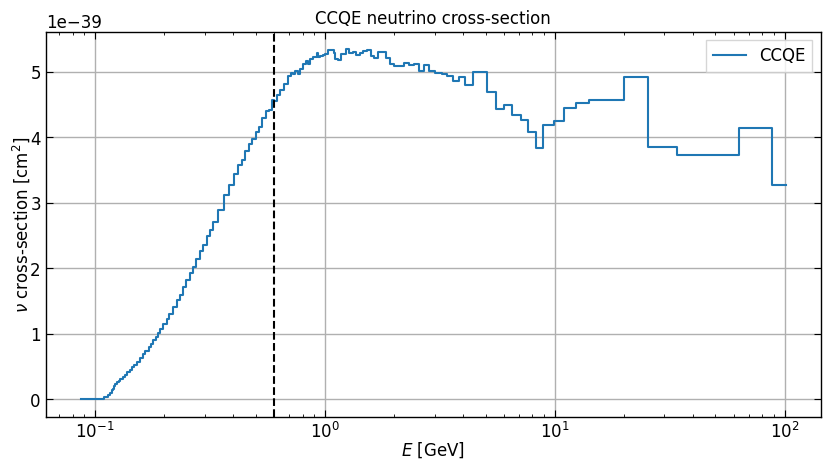

In [99]:
plt.step(xsec.energy, xsec.truexsec, label=r"CCQE", where="mid")
plt.axvline(x=0.6, linestyle="--", color="black")
plt.annotate(r"600 MeV", xy=(0.65, 2e-38), fontsize=10, rotation=90)

plt.xscale("log")
# plt.yscale("log")
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$\nu$ cross-section [$\text{cm}^2$]")
# plt.ylim(bottom=1e-1)
plt.title(r"CCQE neutrino cross-section")
plt.legend()
"""
ax = plt.gca()
axins = inloc.inset_axes(
    ax, width='25%', height='45%', loc=5, borderpad=3
)
axins.set_xlim(0.15, 0.3)
axins.set_ylim(2.5e-38, 3e-38)
plt.step(xsec.energy, xsec.truexsec, label=r"CCQE", where="mid")
axins.grid(True, 'both')
inloc.mark_inset(
    ax, axins, loc1=1, loc2=3,
    fc="none", ec="0.5"
)
"""
plt.show()

.. warning::
    The following is not working anymore, due to a mistake in the renormalization of the cross-section. Please skip directly to the next subsection.

<p> </p>
The data is not very smooth, since it has been read-out from a figure in an article. We can use the Savitzky-Golay filter to smooth it a little.

In [143]:
filtered = pd.DataFrame()
filtered = filtered.assign(energy=savgol_filter(xsec.energy, 10, 2, mode="interp"))
# filtered = filtered.assign(energy = xsec.energy)
filtered = filtered.assign(xsec=savgol_filter(xsec.xsec, 10, 1))
filtered = filtered.assign(truexsec=filtered.xsec * filtered.energy * 1e-38)
filtered.describe()

,energy,xsec,truexsec
count,137.000000,137.000000,1.370000e+02
mean,4.161805,0.406868,3.419693e-39
std,12.439749,0.276642,1.955890e-39
min,0.087239,-0.025766,-2.247758e-41
25%,0.225427,0.147902,1.363587e-39
50%,0.727301,0.402002,4.347828e-39
75%,2.102402,0.664540,5.086192e-39
max,97.103224,0.825985,5.327356e-39


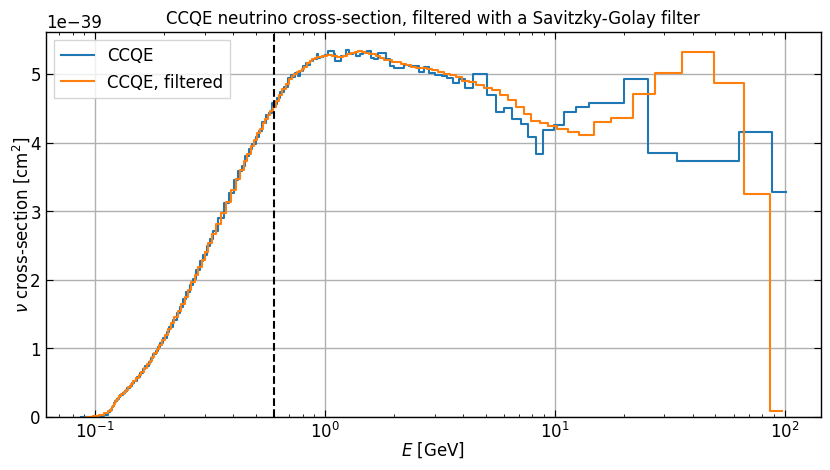

In [144]:
plt.step(xsec.energy, xsec.truexsec, label=r"CCQE", where="mid")
plt.step(filtered.energy, filtered.truexsec, label=r"CCQE, filtered", where="mid")
plt.axvline(x=0.6, linestyle="--", color="black")
plt.annotate(r"600 MeV", xy=(0.65, 2e-38), fontsize=10, rotation=90)

plt.xscale("log")
# plt.yscale("log")
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$\nu$ cross-section [$\text{cm}^2$]")
plt.ylim(bottom=0)
plt.title(r"CCQE neutrino cross-section, filtered with a Savitzky-Golay filter")
plt.legend()
"""
ax = plt.gca()

axins2 = inloc.inset_axes(
    ax, width='25%', height='45%', loc=4, borderpad=3
)
axins2.set_xlim(0.08, 0.12)
axins2.set_ylim(-0.1e-38, 0.5e-38)
plt.step(xsec.energy, xsec.truexsec, label=r"CCQE", where="mid")
plt.step(filtered.energy, filtered.truexsec, label=r"CCQE, filtered", where="mid")
axins2.grid(True, 'both')
inloc.mark_inset(
    ax, axins2, loc1=2, loc2=4,
    fc="none", ec="0.5"
)


axins = inloc.inset_axes(
    ax, width='25%', height='45%', loc=9, borderpad=3
)
axins.set_xlim(0.15, 0.3)
axins.set_ylim(2.5e-38, 3e-38)
plt.step(xsec.energy, xsec.truexsec, label=r"CCQE", where="mid")
plt.step(filtered.energy, filtered.truexsec, label=r"CCQE, filtered", where="mid")
axins.grid(True, 'both')
inloc.mark_inset(
    ax, axins, loc1=1, loc2=3,
    fc="none", ec="0.5"
)
"""
plt.show()

<p> </p>
This plot shows a better reconstructed cross-section, but with a mismatch around 0.1 GeV (due to the abrupt beginning of the data). One way to solve this is to fix manually the points back to the ones read on the figure.

In [114]:
for key in ["energy", "xsec", "truexsec"]:
    filtered.loc[0:5, key] = xsec.loc[0:5, key]

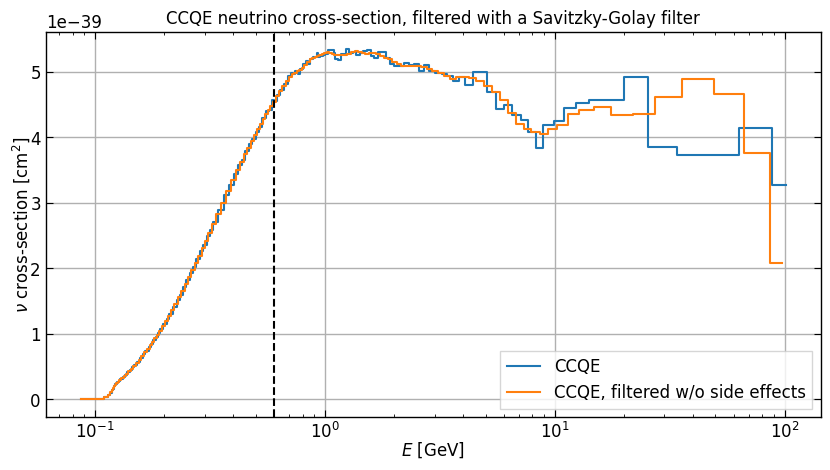

In [115]:
plt.step(xsec.energy, xsec.truexsec, label=r"CCQE", where="mid")
plt.step(
    filtered.energy,
    filtered.truexsec,
    label=r"CCQE, filtered w/o side effects",
    where="mid",
)
plt.axvline(x=0.6, linestyle="--", color="black")
plt.annotate(r"600 MeV", xy=(0.65, 2e-38), fontsize=10, rotation=90)

plt.xscale("log")
# plt.yscale("log")
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$\nu$ cross-section [$\text{cm}^2$]")
# plt.ylim(bottom=1e-1)
plt.title(r"CCQE neutrino cross-section, filtered with a Savitzky-Golay filter")
plt.legend()

plt.show()

<p> </p>

## Fitting the cross-section data

The data is not very smooth, since it has been read-out from a figure in an article. The shape of $\sigma / E$ looks like a Maxwell-Boltzmann, so we can try fitting it.

In [182]:
def maxwell(x, a, b):
    return np.sqrt(2 / np.pi) * ((x) ** 2 / a**3) * np.exp(-((x + b) ** 2) / (2 * a**2))

In [208]:
def lognormal(x, sigma, mu):
    return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(
        -((np.log(x) - mu) ** 2) / (2 * sigma**2)
    )

In [209]:
# params = stats.maxwell.fit(xsec.xsec, floc=0)
parameters, covariance = optimize.curve_fit(lognormal, xsec.energy, xsec.xsec)

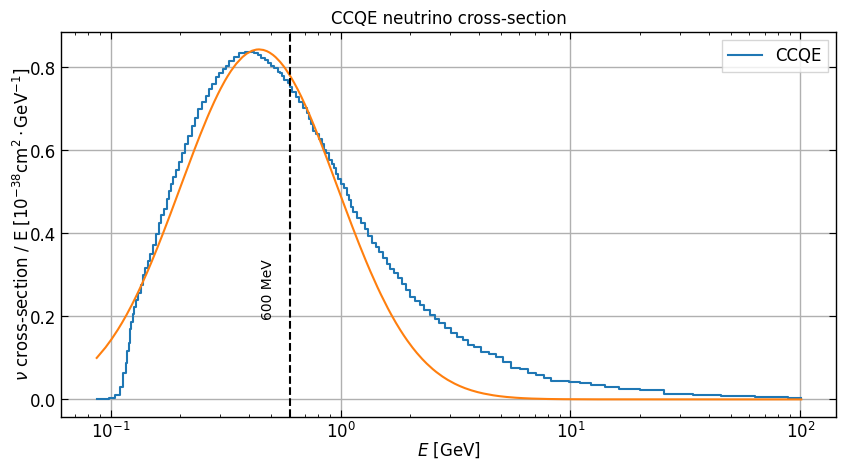

In [210]:
plt.step(xsec.energy, xsec.xsec, label=r"CCQE", where="mid")
plt.plot(xsec.energy, lognormal(xsec.energy, *parameters))
plt.axvline(x=0.6, linestyle="--", color="black")
plt.annotate(r"600 MeV", xy=(0.45, 2e-1), fontsize=10, rotation=90)

plt.xscale("log")
# plt.yscale("log")
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$\nu$ cross-section / E [$10^{-38} \text{cm}^2 \cdot \text{GeV}^{-1}$]")
# plt.ylim(bottom=1e-1)
plt.title(r"CCQE neutrino cross-section")
plt.legend()

plt.show()

In [185]:
print(*parameters)

0.4094502863440786 0.10818437109468165


## Interpolation

<p> </p>
We'll keep the filtered way in the further analysis, without any other checks, since the reading technique used for the unfiltered data is not precise in itself.

In order to convolve interaction cross-section with the flux, one needs the same bining for the two histograms (the $\texttt{numpy}$ function $\texttt{convolve}$ takes two one-dimensionnal arrays). The way to do so is to interpolate the $(x,y)$ data of one of the two quantities with the $(x)$ of the other. Since :
<ul>
  <li>the flux is the "input" data of the FD (cross-section is more of a filter, a detector response);</li>
  <li>the flux binning is smaller;</li>
  <li>the flux data is "cleaner" (collected from T2K collab.) than the cross-section (read from a figure);</li>
</ul> 
we choose to to interpolate the cross-section data to fit the flux binning.

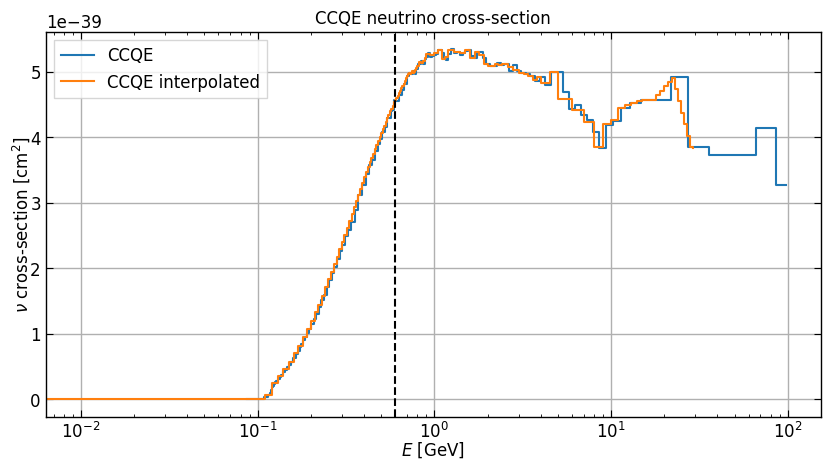

In [204]:
xsec_interp = np.interp(
    (fluxes.minE + fluxes.maxE) / 2, xsec.energy, xsec.truexsec, left=0, right=0
)

plt.step(filtered.energy, xsec.truexsec, label=r"CCQE", where="mid")
plt.step(fluxes.minE, xsec_interp, label=r"CCQE interpolated", where="post")
plt.axvline(x=0.6, linestyle="--", color="black")
plt.annotate(r"600 MeV", xy=(0.65, 2e-38), fontsize=10, rotation=90)

plt.xscale("log")
# plt.yscale("log")
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$\nu$ cross-section [$\text{cm}^2$]")
# plt.ylim(bottom=1e-1)
plt.title(r"CCQE neutrino cross-section")
plt.legend()

plt.show()

___________________________________________________________________

## Multiplying flux and cross-section

In [211]:
number = pd.DataFrame()
for key in ["minE", "maxE"]:
    number[key] = fluxes[key]
for key in ["numu", "nue", "antinumu", "antinue"]:
    number[key] = xsec_interp * fluxes[key] * (50 * 1e21)

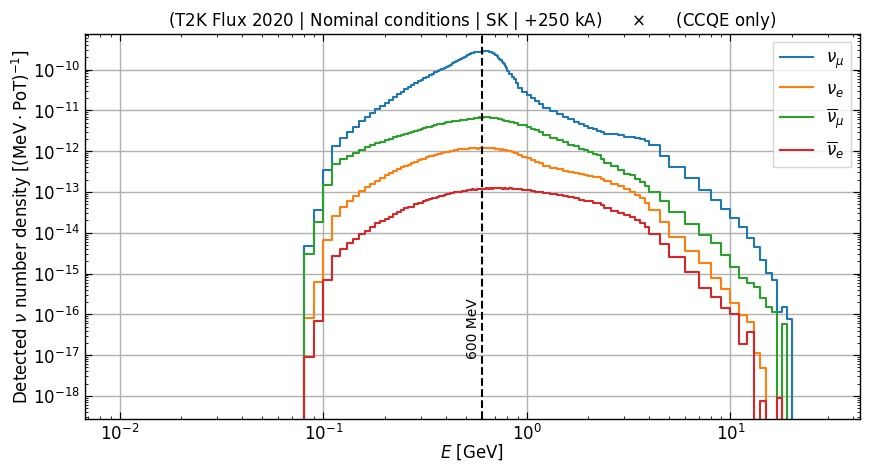

In [212]:
plt.step(number.minE, number.numu, label=r"$\nu_\mu$")
plt.step(number.minE, number.nue, label=r"$\nu_e$")
plt.step(number.minE, number.antinumu, label=r"$\overline{\nu}_\mu$")
plt.step(number.minE, number.antinue, label=r"$\overline{\nu}_e$")
plt.axvline(x=0.6, linestyle="--", color="black")
plt.annotate(r"600 MeV", xy=(0.5, 1e-17), fontsize=10, rotation=90)

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"Detected $\nu$ number density [$(\text{MeV} \cdot \text{PoT})^{-1}$]")
# plt.ylim(bottom=1e-1)
plt.title(
    r"(T2K Flux 2020 | Nominal conditions | SK | $+250$ kA) $\ \ \ \ \times \ \ \ \ $ (CCQE only)"
)
plt.legend()

plt.show()

In [200]:
number = number.assign(total=lambda df: df.numu + df.nue + df.antinumu + df.antinue)

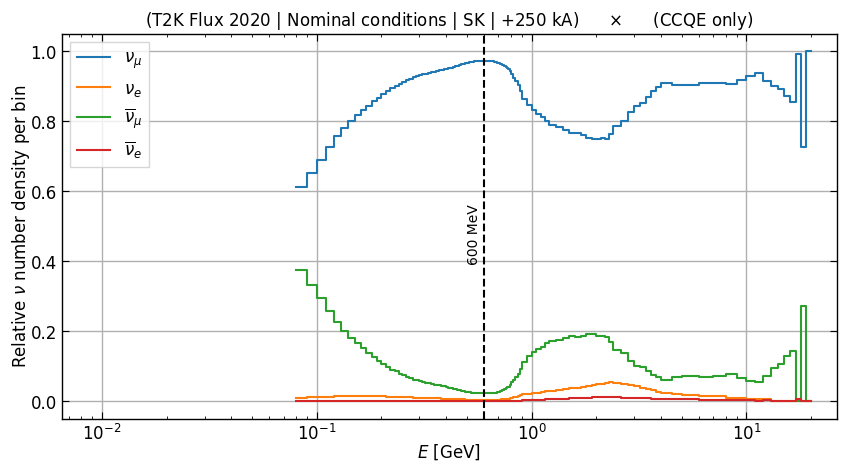

In [201]:
plt.step(number.minE, number.numu / number.total, label=r"$\nu_\mu$")
plt.step(number.minE, number.nue / number.total, label=r"$\nu_e$")
plt.step(number.minE, number.antinumu / number.total, label=r"$\overline{\nu}_\mu$")
plt.step(number.minE, number.antinue / number.total, label=r"$\overline{\nu}_e$")
plt.axvline(x=0.6, linestyle="--", color="black")
plt.annotate(r"600 MeV", xy=(0.5, 4e-1), fontsize=10, rotation=90)

plt.xscale("log")
# plt.yscale('log')
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"Relative $\nu$ number density per bin")
# plt.ylim(bottom=1e-4)
plt.title(
    r"(T2K Flux 2020 | Nominal conditions | SK | $+250$ kA) $\ \ \ \ \times \ \ \ \ $ (CCQE only)"
)
plt.legend()
plt.xlim([6.5e-3, None])

plt.show()

________________________________________________________________________
## Some tests

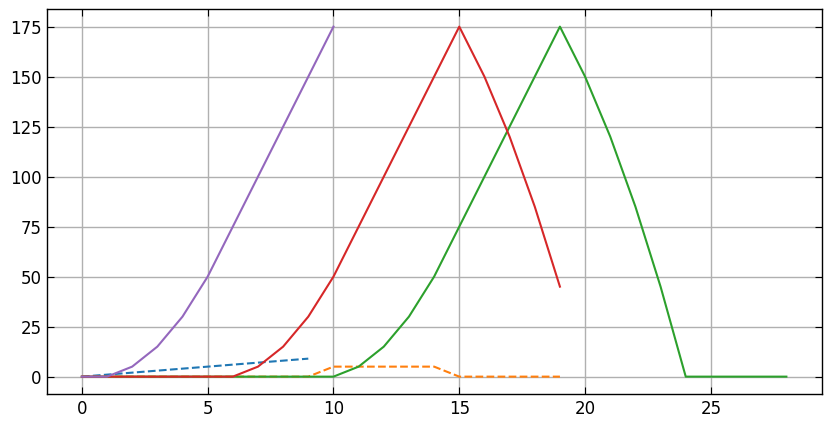

In [77]:
l1 = [x for x in range(10)]
l2 = 10 * [0] + [5] * 5 + [0] * 5
convf = np.convolve(l2, l1, mode="full")
convs = np.convolve(l1, l2, mode="same")
convv = np.convolve(l1, l2, mode="valid")
plt.plot(l1, linestyle="dashed")
plt.plot(l2, linestyle="dashed")
for l in [convf, convs, convv]:
    plt.plot(l)
plt.show()

Sum of uniform pmf: 0.9999999999998996
Sum of normal pmf: 1.0000000000023075
Sum of convoluted pmf: 1.0000000000023057


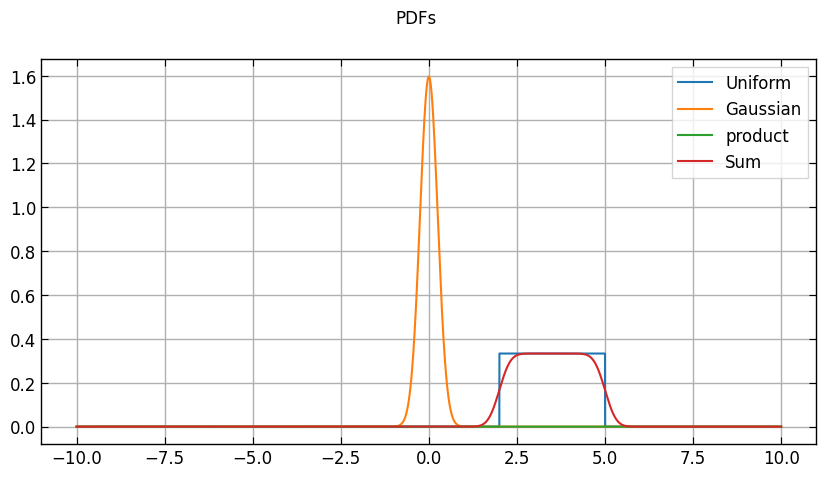

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy import signal


uniform_dist = stats.uniform(loc=2, scale=3)
std = 0.25
normal_dist = stats.norm(loc=0, scale=std)

delta = 1e-4
big_grid = np.arange(-10, 10, delta)

pmf1 = uniform_dist.pdf(big_grid) * delta
print("Sum of uniform pmf: " + str(sum(pmf1)))

pmf2 = normal_dist.pdf(big_grid) * delta
print("Sum of normal pmf: " + str(sum(pmf2)))


conv_pmf = signal.fftconvolve(pmf2, pmf1, "same")
print("Sum of convoluted pmf: " + str(sum(conv_pmf)))

pdf1 = pmf1 / delta
pdf2 = pmf2 / delta
conv_pdf = conv_pmf / delta
# print("Integration of convoluted pdf: " + str(np.trapz(conv_pdf, big_grid)))

# new_grid=np.arange(0,len(conv_pdf),delta)

plt.plot(big_grid, pdf1, label="Uniform")
plt.plot(big_grid, pdf2, label="Gaussian")
plt.plot(big_grid, pdf1 * pdf2, label="product")
plt.plot(big_grid, conv_pdf, label="Sum")
plt.legend(loc="best"), plt.suptitle("PDFs")
plt.show()